In [1]:
import QuantLib as ql

In [2]:
calculation_date = ql.Date(4, 5, 2021)
ql.Settings.instance().evaluationDate = calculation_date

In [3]:
day_count = ql.Actual365Fixed()

In [4]:
disc_quote = ql.SimpleQuote(0.01)
disc_quote_handle = ql.QuoteHandle(disc_quote)

fwd_quote = ql.SimpleQuote(0.01)
fwd_quote_handle = ql.QuoteHandle(fwd_quote)

In [5]:
discount_curve = ql.YieldTermStructureHandle(
    ql.FlatForward(calculation_date, disc_quote_handle, day_count)
)

fwd_curve = ql.YieldTermStructureHandle(
    ql.FlatForward(calculation_date, fwd_quote_handle, day_count)
)



In [20]:
disc_bump = ql.SimpleQuote(0.0000)
disc_bump_handle = ql.QuoteHandle(disc_bump)
fwd_bump = ql.SimpleQuote(0.0000)
fwd_bump_handle = ql.QuoteHandle(fwd_bump)

In [21]:
discount_curve_bump = ql.YieldTermStructureHandle(ql.SpreadedLinearZeroInterpolatedTermStructure(discount_curve, [disc_bump_handle, disc_bump_handle], [calculation_date, calculation_date+ql.Period("120Y")]))

In [22]:
fwd_curve_bump = ql.YieldTermStructureHandle(ql.SpreadedLinearZeroInterpolatedTermStructure(fwd_curve, [fwd_bump_handle, fwd_bump_handle], [calculation_date, calculation_date+ql.Period("120Y")]))

In [50]:
index = ql.Euribor6M(fwd_curve_bump)

In [51]:
vol = ql.ConstantSwaptionVolatility(calculation_date, ql.TARGET(), ql.ModifiedFollowing, ql.QuoteHandle(ql.SimpleQuote(0.0030)), ql.Actual365Fixed(),
                                   ql.Normal)
vol_handle = ql.SwaptionVolatilityStructureHandle(vol)

In [52]:
swaption_engine = ql.BachelierSwaptionEngine(discount_curve_bump, vol_handle)

In [53]:
calendar = ql.TARGET()
settle_date = calendar.advance(calculation_date, 50, ql.Years)
maturity_date = calendar.advance(settle_date, 50, ql.Years)

fixed_leg_tenor = ql.Period(1, ql.Years)
fixed_schedule = ql.Schedule(settle_date, maturity_date, 
                             fixed_leg_tenor, calendar,
                             ql.ModifiedFollowing, ql.ModifiedFollowing,
                             ql.DateGeneration.Forward, False)

float_leg_tenor = ql.Period(6, ql.Months)
float_schedule = ql.Schedule (settle_date, maturity_date, 
                              float_leg_tenor, calendar,
                              ql.ModifiedFollowing, ql.ModifiedFollowing,
                              ql.DateGeneration.Forward, False)

In [54]:
notional = 10000000
fixed_rate = 0.01
fixed_leg_daycount = ql.Actual360()
float_spread = 0.0
float_leg_daycount = ql.Actual360()

ir_swap = ql.VanillaSwap(ql.VanillaSwap.Payer, notional, fixed_schedule, 
               fixed_rate, fixed_leg_daycount, float_schedule,
               index, float_spread, float_leg_daycount )

In [55]:
swap_engine = ql.DiscountingSwapEngine(discount_curve_bump)
ir_swap.setPricingEngine(swap_engine)

In [56]:
ir_swap.NPV()

14308214.83233465

In [57]:
exercise = ql.EuropeanExercise(settle_date)
swaption = ql.Swaption(ir_swap, exercise)

In [58]:
swaption.setPricingEngine(swaption_engine)

In [59]:
swaption.NPV()

14312103.696919002

disc_quote.setValue(0.05)
fwd_quote.setValue(0.05)
print("Swap:",ir_swap.NPV())
print("Swaption:",swaption.NPV())

fwd_quote.setValue(0.01)
disc_quote.setValue(0.01)

rates = [i * 0.001 for i in range(5,60)]
swap_npvs = []
swpt_npvs = []
for rate in rates:
    disc_quote.setValue(rate)
    fwd_quote.setValue(rate)
    swap_npvs+=[ir_swap.NPV()]
    swpt_npvs+=[swaption.NPV()]

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
disc_bump.setValue(0.00)
fwd_bump.setValue(0.00)

rates = [i * 0.001 for i in range(-20,60)]
swap_npvs = []
swpt_npvs = []
for rate in rates:
    disc_bump.setValue(rate)
    #fwd_bump.setValue(rate)
    swap_npvs+=[ir_swap.NPV()]
    swpt_npvs+=[swaption.NPV()]

Text(0.5,1,'NPV bei Shift der Discount Curve')

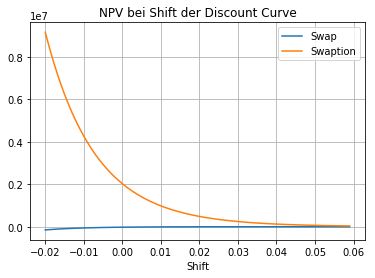

In [69]:
plt.plot(rates,swap_npvs, label="Swap")
plt.plot(rates,swpt_npvs, label="Swaption")
plt.xlabel("Shift")
plt.legend()
plt.grid()
plt.title("NPV bei Shift der Discount Curve")

#plt.title("NPV bei Shift der Fwd Curve")
#plt.title("NPV bei Shift beider Curves")

Text(0.5,1,'NPV bei Shift der Fwd Curve')

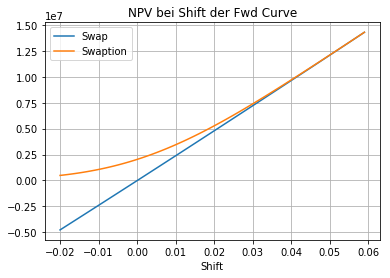

In [70]:
disc_bump.setValue(0.00)
fwd_bump.setValue(0.00)

rates = [i * 0.001 for i in range(-20,60)]
swap_npvs = []
swpt_npvs = []
for rate in rates:
    #disc_bump.setValue(rate)
    fwd_bump.setValue(rate)
    swap_npvs+=[ir_swap.NPV()]
    swpt_npvs+=[swaption.NPV()]

plt.plot(rates,swap_npvs, label="Swap")
plt.plot(rates,swpt_npvs, label="Swaption")
plt.xlabel("Shift")
plt.legend()
plt.grid()
#plt.title("NPV bei Shift der Discount Curve")
plt.title("NPV bei Shift der Fwd Curve")
#plt.title("NPV bei Shift beider Curves")

Text(0.5,1,'NPV bei Shift beider Curves')

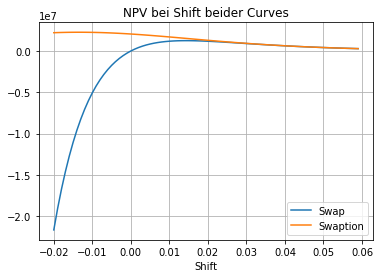

In [71]:
disc_bump.setValue(0.00)
fwd_bump.setValue(0.00)

rates = [i * 0.001 for i in range(-20,60)]
swap_npvs = []
swpt_npvs = []
for rate in rates:
    disc_bump.setValue(rate)
    fwd_bump.setValue(rate)
    swap_npvs+=[ir_swap.NPV()]
    swpt_npvs+=[swaption.NPV()]

plt.plot(rates,swap_npvs, label="Swap")
plt.plot(rates,swpt_npvs, label="Swaption")
plt.xlabel("Shift")
plt.legend()
plt.grid()
#plt.title("NPV bei Shift der Discount Curve")
#plt.title("NPV bei Shift der Fwd Curve")
plt.title("NPV bei Shift beider Curves")